# Housing Prices of Boston

### GMIT - Machine Learning and Statistics
### Guilherme Galluzzi Couto Paes - g00364695

<p align="center"><img src="https://www.southeastradio.ie/wp-content/uploads/2016/09/HousePrices.png" width=250px></p><br>

## Overview

This project is being made as a study on the known Boston Houses data set [1]. This dataset is made from a study from a US census regarding various house prices in different areas in the city of Boston, MA. Besides the price, the dataset also contains other 13 attributes, such as the crime rate, the local property tax rate, and so on (which I will cover in detail over the next section)

This data was first published in 1978 by Harrison, D. and Rubinfeld, D.L. and it contains around 506 samples, which makes it fairly small given the size of Boston.

I will try to keep this project as objective as possible, so this notebook will be divided into 3 sections as follows:

1. Descriptive: The first section will be focused on conducting a statistical study on the dataset, where I will use descriptive statistics and plots to describe the Boston houses prices dataset.

2. Inferential: This section will be used to analyse the dataset using inferential statistics in order to determine differences in house prices between those along the Charles river and those not close to the river.

3.  Predict: The last section will be left for the prediction, Where I will be utilizing the Python library, keras, to build a neural network model that will be able to predict the median house price.

*****

In [1]:
# Importing all the necessary Python libraries necessary for this project

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as ss
import keras as kr
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold,  cross_val_score
from sklearn.datasets import load_boston

Using TensorFlow backend.


****

## 1. Descriptive

Descriptive statistics is used to describe and summarize a data set, and it can be used the entire representation or a sample of the data. descriptive statistics also masures the mean, median, mode an other measures such as standard deviation, variance and the kurtosis and skewness.

Frst I will use descriptive statistics and plots in order to better understand the dataset to be studied, and also to understand the correlation between all the variables.

In [2]:
# creating a var for the dataset which was imported from sklear datasets
boston = load_boston()

It's also good to understand all the values of the dataset, so we run the following code:

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


This translates to the following:

- data: contains the raw dataset
- target: prices of the houses
- feature_names: names of all the attributes
- DESCR: describes the attributes from the dataset

We can have a further look into the description:

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

As we can see, the dataset has relatively few data points, only 506, and it's worth noting that each feature in the input data has a different scale, where some inputs take values between 0 and 1; others between 1 and 12, others between 0 and 100, and so on (as can be seen on the next cell)

With the basics of the dataset explained, we can now move on and have a quick look at the dataset itself:

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


As previously stated in the Overview, the target here is the median price of the houses, and this attribute is not shown in the above dataframe, so it's necessary to add it to the dataframe:

In [6]:
df['MEDV'] = boston.target

In [7]:
#Showing the updated dataframe

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to analyze this data in a more quantitative description, I will make use of the pandas describe function which gives us a well displayed summary of descriptive statistics:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above, if we observe the mean (22.53) and the median (21.2) we can notice that the distribution is slightly right skewed. This is more obvious looking at distribution plots below.

#### Plotting and correlation

In order to better visualize the target we can plot the distribution of the target using the distplot function from seaborn, which is able to combine a histogram with a kernel density estimation plot:

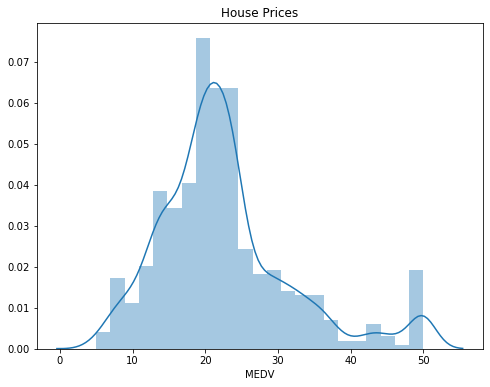

In [9]:
# plotting the the distribution of house prices
plt.figure(figsize=(8,6))
sns.distplot(df['MEDV'])
plt.title('House Prices')
plt.show()

To be easier to understand, we can make use of the histogram to graphically summarize and display the distribution of a process data set. This gives us a good look at the data, as to find out if it's symmetric or if it's skewed or even if the data contain outliers.



<function matplotlib.pyplot.show(*args, **kw)>

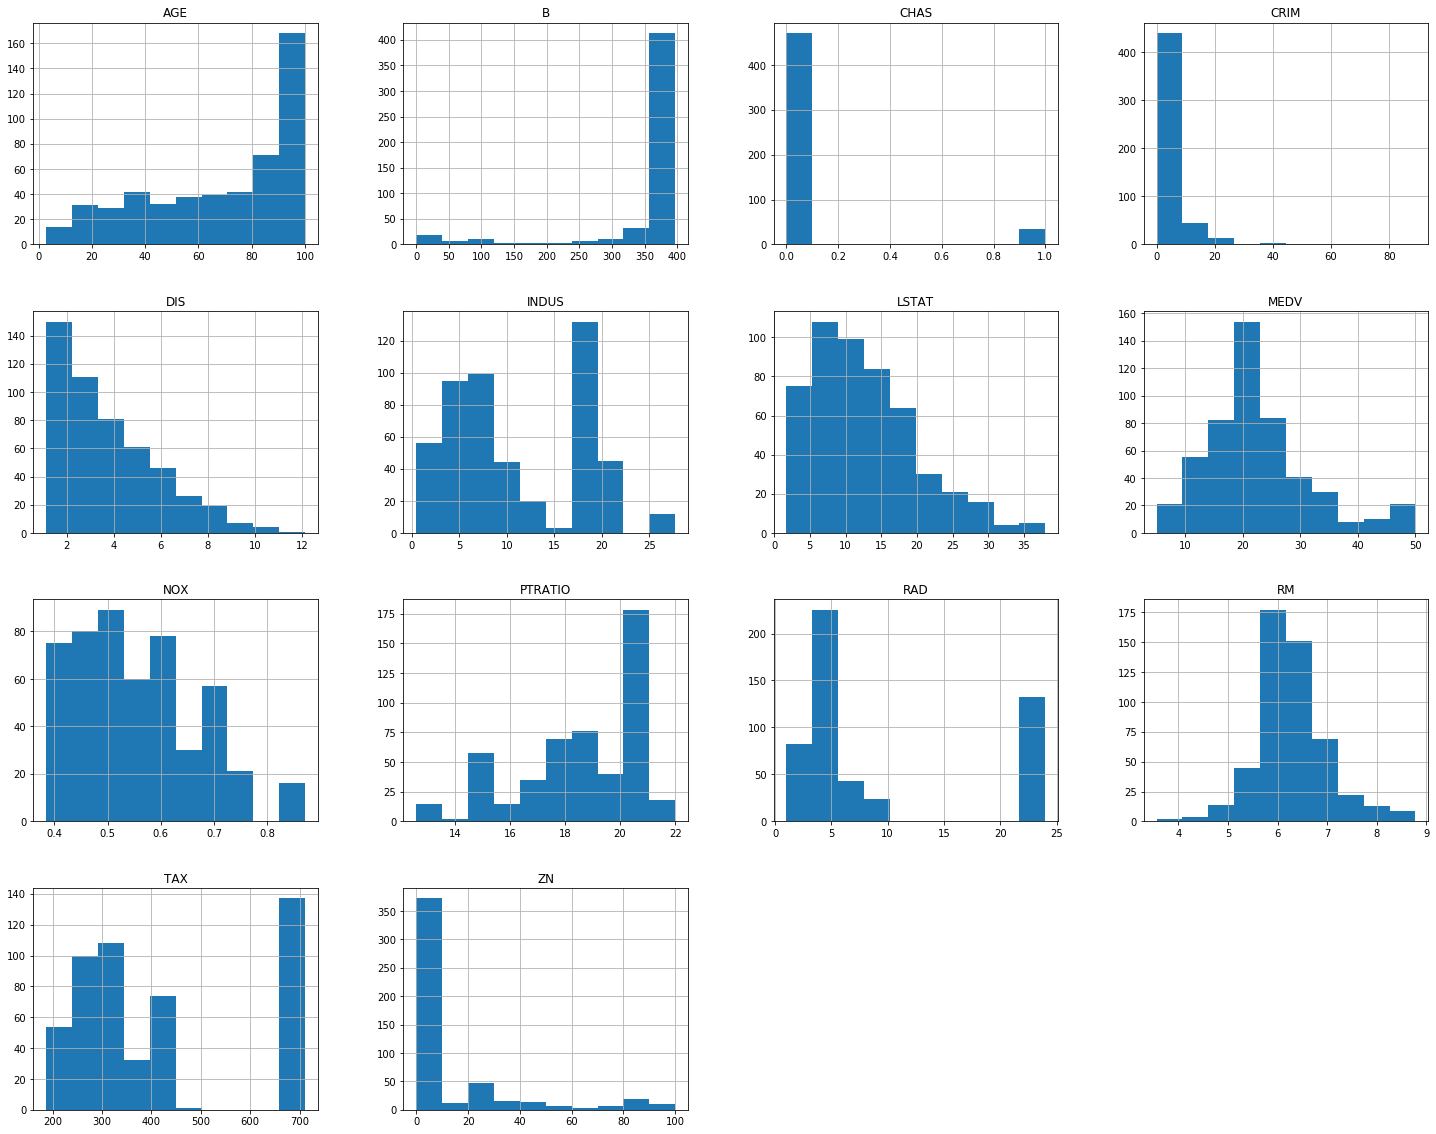

In [10]:
# plotting a histogram for each of the features

df.hist(figsize=(25, 20))
plt.show

It's also important to have a look into the correlation between the attributes, for this we can use the pandas function .corr(), which will provide us with all attributes and values in a range between -1 and 1, where 1 means a total correlation, 0 no correlation and -1 negative correlation.

This information is very important as it can help determine which variables are correlated and thus, worth further investigation.

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


For better visualization purposes we can utilize seaborn to plot a heattmap of these correlations:

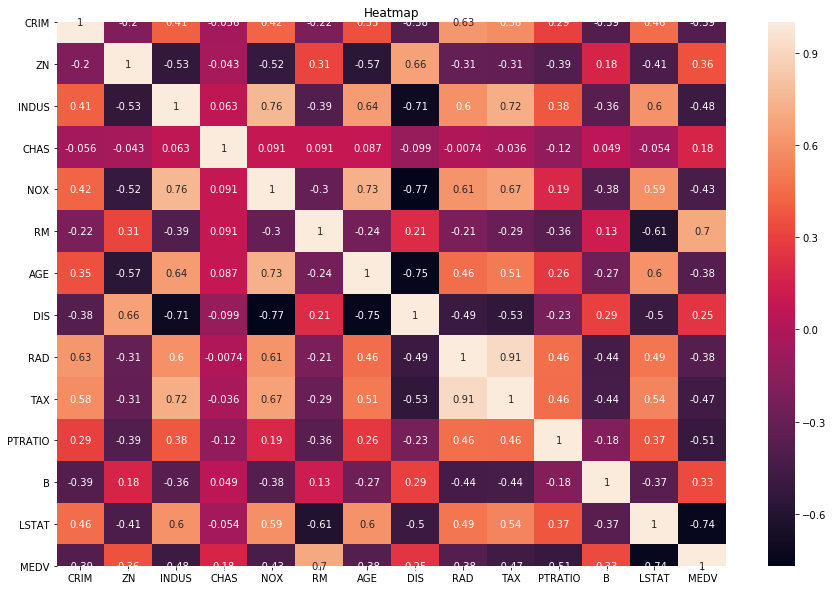

In [12]:
# generating a heatmap
plt.figure(figsize=(15,10))
plt.title('Heatmap')
sns.heatmap(data=df.corr(), annot=True)
plt.show()

By looking at the above correlation heatmap we can easily identify that RM has a strong positive correlation with MEDV (0.7) and that LSTAT and PTRATIO have a high negative correlation with MEDV (-0.74) and (-0.51) respectively.

I was able to describe in more details the relation between the attributes and their values using the help of Python and its libraries.

On the next section I will start covering the correlation between house prices using inferential statistics.

******

## 2. Inferential

Inferential statistics uses a sample of data set in order to describe and also make inferences about the data. The use of inferential statistics helps to make generalizations about the data.

In this section I will analyze if there is significante difference in the house prices between houses that are along the Charles river and those that aren't, so in order to do so, the first step is splitting the dataset into 2 categories, those along the river and those that are not close to the river.


#### Splitting the Dataset into houses that are along the river

In [13]:
#separating CHAS and MEDV in another Dataframe
charles = ['CHAS', 'MEDV']
dfchas = df[charles]

#Filtering only the houses that are close to the charles river
charles1 = df['CHAS']==1
df_charles = dfchas[charles1]
price_close = df_charles['MEDV']

#houses that are far from the charles river
far = df['CHAS']==0
df_far = dfchas[far]
price_far = df_far['MEDV']

#printing number of houses
print("\n")
print("Number of houses along the river: " + str(df_charles.shape[0]))
print("Number of houses far from the river: " + str(df_far.shape[0]))



Number of houses along the river: 35
Number of houses far from the river: 471


Having a quick look into the descriptive statistical differences both categories have:

In [48]:
#describing price of houses close to the river
price_close.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [49]:
#describing price of houses far from the river
price_far.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

As we can quickly see, the prices do seem to diverge slightly, for example:

- The min price of houses close to the river is 13, as in the houses far from the river is 5
- The mean price of houses close to the river is 28.44, as in the houses far from the river is 22.09

#### Running a T-Test

In order to accurately determine if indeed there is a statistical difference between the means from both categories, we can run a T test, which is a kind of inferential statistic used to determine if there is any difference between the means of two samples, which may be related in certain features. [7]

The T-Test is also used as a hypothesis testing tool, in other words, it allows us of testing an assumption applicable to a given population.

The T-Test assumes a null hypothesis that the two means are equal, but after running certain calculations and comparing the standard values, we can determine if the null hypothesis is accepted or rejected, which is measured as the p-value. A large p-value (usually greater than 0.05 or 0.1) means that we cannot reject the null hypothesis, as if the p-value is smaller than 1%, 5% or even 10% sometimes, then we can reject the null hypothesis of equal averages.

In python we can make use of SciPy library to calculate the T-test as below: 

In [14]:
ss.ttest_ind(price_far, price_close)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

As we can see from the above calculation, the result of the T-Test between the price close and far from the river Charles is 7.390623170519883e-05. Which makes it clear to determine that the p-value is below 1%, this would imply that we can safely reject the null hypothesis, and therefore conclude that there is indeed a difference in the mean price between houses along the river and those not along river

#### OLS Regression

Ordinary least squares (OLS) regression is a statistical method that is used to estimate the relationship between one or more independent variables and a dependent variable [4]; OLS regression minimizes the sum of square differences between the observed and predicted values of the dependent variable. 

In [53]:
# Separating the columns to create OLS model for houses along the river
a=df[df['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
b=df[df['CHAS']==1]['MEDV']

# OLS Regression for houses along the charles river
model = sm.OLS(b, a).fit()
ols_predict = model.predict(a)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:54:24   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS       -9.237e-14   5.31e-13     -0.174      0.8

In [16]:
# Separating the columns to create OLS model for houses not along the river
c=df[df['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
d=df[df['CHAS']==0]['MEDV']

# OLS Regression for houses not along the charles river
model_b = sm.OLS(d, c).fit()
ols_predict_b = model_b.predict(c)
print(model_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1185.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                   1.02e-312
Time:                        18:08:12   Log-Likelihood:                         -1411.9
No. Observations:                 471   AIC:                                      2842.
Df Residuals:                     462   BIC:                                      2879.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The summary above provides a lot of information about the fit. The left part of the first table provides basic information about the model fit, the right shows the goodness of fit, and the the second table, reports for each of the coefficients

Just to give a bit further exaplanation on what I believe to be the most important analysis on the summary above:

- R-squared or coefficient of determination, is a statistical measure of how well the regression line fits the data.
- Adjusted R-squared adjusts the statistics based on the number of independent variables.
- t-statistic is the ratio of deviation of the estimated value of a parameter from its hypothesized value to its standard error.
- F-statistic is calculated as the ratio of mean squared error of the model and mean squared error of residuals.
- Akaike Information Criterion (AIC) estimates the relative quality of statistical models for a given dataset.
- BIC, or Bayesian Information Criterion, is used as a criterion for model selection among a finite set of models. BIC is like AIC, but adds a higher penalty for models with more parameters.

#### Further Analysis and plotting

In [17]:
# checking the median price for houses along the river
mchas1 = price_close.median()
mchas0 = price_far.median()

print ("The median price for houses close to the river in $1000's is: ${0:.2f}".format(mchas1), "\n")
print ("The median price for houses far from the river in $1000's is: ${0:.2f}".format(mchas0))

The median price for houses close to the river in $1000's is: $23.30 

The median price for houses far from the river in $1000's is: $20.90


As we can see from the plot below, we can easily notice how the median price is slightly higher on the houses that are along the Charles river, the same can be said for the minimum/max price, although we do see some outliers with higher price on the houses that are not along the river, but that could be due to the fact that on this sample we only have 35 houses along the river, while having 471 which are not close to the river, what can cause having more outliers

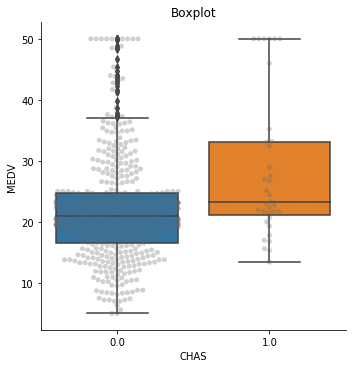

In [20]:
# A boxplot and also a swarm plot so we can see all data in the background

sns.catplot(x="CHAS", y="MEDV", data=df, kind="box")
sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".40", alpha=0.3)
plt.title('Boxplot')
plt.show()
# CHAS 0 means far from the river, and 1 close to ther river

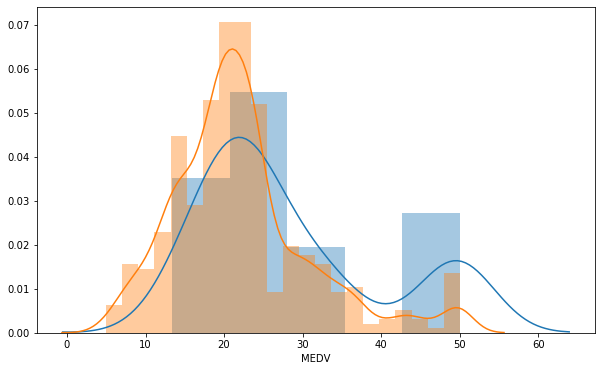

In [21]:
# distribution plot of house prices along/not along the river

plt.figure(figsize=(10,6))
ax1 = sns.distplot(price_close)
ax2 = sns.distplot(price_far)

Although the boxplots seems to show better the differences between the data, the above distribution plot can show us that both distributions have a similar shape

*****

## 3. Predict

The main objective of this section is to build a working model that is able to predict the value of the Boston houses, in order to do so, I will first need to separate the dataset into features and the target variable. The features, will provide quantitative information, as the target, 'MEDV', will be the variable to predict.

Also, according to my previous analysis, I identified that RM, LSTAT and PTRATIO are highly correlated, therefore it makes sense to use it as features in order to compare it with the price target MEDV.

The first step necessary is to split the data using Sklearn [2] and afterwards build a model and train it with the help of Keras [3].

#### Splitting the dataset

When building a machine learning model, usually, we split the data set into training and testing sets, where the training set is used to train the model and the testing set to test it.

After some research it seems that the most common split ratio is 70:30, but given that this is a small dataset I will be using a split ratio of 80:20. This splitting is done in order to easily model the dataset, as for the unseen data it's used to validate the model performance.



In [22]:
#First, split the dataset
Y = df['MEDV']
X = df[['RM', 'LSTAT', 'PTRATIO']]

# Split the inputs and outputs into training and test sets
# random_state will set a seed to the random generator
# test_size=0.2 represents a split ratio of 80:20.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)


# checking the shape of Test and Train
print("\nTotal values of X_Train :" ,X_train.shape[0])
print("Total values of X_Test  :"   ,X_test.shape[0])
print("\nTotal values of Y_Train :" ,Y_train.shape[0])
print("Total values of Y_Test  :"   ,Y_test.shape[0])


Total values of X_Train : 404
Total values of X_Test  : 102

Total values of Y_Train : 404
Total values of Y_Test  : 102


In [23]:
# prints first 5 values of X_test
X_test.head()

,RM,LSTAT,PTRATIO
337,5.895,10.56,20.2
30,5.713,22.60,21.0
364,8.780,5.29,20.2
240,6.897,11.38,16.6
162,7.802,1.92,14.7


In [24]:
# prints first 5 values of Y_test
Y_test.head()

337    18.5
30     12.7
364    21.9
240    22.0
162    50.0
Name: MEDV, dtype: float64

#### Linear Regression

In [25]:
# building a linear regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)

lm_predict = lm.predict(X_test)
mse_lm = sklearn.metrics.mean_squared_error(Y_test, lm_predict)
print("Mean Squared Error: " + str("%.3f" % mse_lm))

Mean Squared Error: 28.052


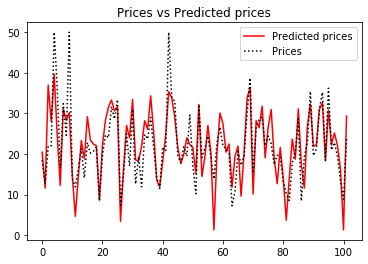

In [26]:
plt.plot(lm_predict, 'r-', label='Predicted prices')
plt.plot(Y_test.values, 'k:', label='Prices')
plt.title("Prices vs Predicted prices")
plt.rcParams['figure.figsize'] = (20, 10)
plt.legend()
plt.show()

As we can see, the linear regression model wasn't able to do a very good job, with it's very high mean square error of around 28, I believe we can obtain better results building a new model with the help of Keras

#### Building a model

As stated above, in order to obtain better results, we can make use of the Keras library and build a sequential model, which basically is a linear stack of layers.

When building a neural network, it's necessary to set an activation function, which is used to find the output of a neural layer and map the results, I made a few tests and decided to make use of the relu activation method, relu stands for rectified linear unit, this activation method was giving slightly better results for this model upon comparing it with other methods, and also it takes less time to train, it converges faster and it's sparsely activated

The input_dim=3 stands represents the 3 variables we have on the data, RM, LSTAT and PTRATIO.

The first layer has 140 nodes, the second 60, the third 30, and they all use relu activation method, as for the last layer, it uses a single node with linear activation.

The next step is where we start to configure the learning process, which can be done by compiling the model, where it receives 3 arguments, an optimizer, a loss function and a list of metrics.

For the optimizer, I have choosen to use the Adam opitimizer [5], which is a combination of RMSprop and Stochastic Gradient Descent with momentum, it uses the squared gradients to scale the learning rate like RMSprop. I have also added a metric that will track the Mean absolute error, mae is an average of the absolute errors, and it's commonly used to forecast error in machine learning models. Once the model is compiled, we can move to start training the model.

In [27]:
# Create a new neural network
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(120, input_dim=3, activation='relu'))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30, activation="relu"))
m.add(kr.layers.Dense(1)) #the activation here is linear

# Compile the model
m.compile(loss="mse", optimizer="adam", metrics = ['mae'])

# Train the model
m.fit(X_train, Y_train, epochs=120, batch_size=5)

Epoch 1/120
404/404 [==============================] - 1s 1ms/step - loss: 153.7281 - mae: 8.8226
Epoch 2/120
404/404 [==============================] - 0s 286us/step - loss: 51.2551 - mae: 5.1413
Epoch 3/120
404/404 [==============================] - 0s 269us/step - loss: 43.7951 - mae: 4.9210
Epoch 4/120
404/404 [==============================] - 0s 272us/step - loss: 38.6446 - mae: 4.5827
Epoch 5/120
404/404 [==============================] - 0s 279us/step - loss: 33.1265 - mae: 4.4040
Epoch 6/120
404/404 [==============================] - 0s 267us/step - loss: 27.2569 - mae: 3.8856
Epoch 7/120
404/404 [==============================] - 0s 284us/step - loss: 25.8835 - mae: 3.7421
Epoch 8/120
404/404 [==============================] - 0s 267us/step - loss: 24.0542 - mae: 3.6019
Epoch 9/120
404/404 [==============================] - 0s 264us/step - loss: 21.8424 - mae: 3.3580
Epoch 10/120
404/404 [==============================] - 0s 264us/step - loss: 21.6829 - mae: 3.3555
Epoch 11/1

In [28]:
# summary of the neural network
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               480       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [29]:
# evaluate the model
eval = m.evaluate(X_test, Y_test)

print('Loss:', float("{0:.4f}".format(eval[0])))
print('Accuracy:', float("{0:.4f}".format(eval[1])))

102/102 [==============================] - 0s 655us/step
Loss: 24.0457
Accuracy: 3.4752


#### Predict

In [30]:
# Have the network predict the test inputs.
predictions = m.predict(X_test)

In [31]:
# creating a var for mse value
mse = sklearn.metrics.mean_squared_error(Y_test, predictions)

In [32]:
# Comparing the predictions to the original house prices

#needed to reshape the predictions to have same dimension as Y_test

# Create a dataframe to store the predicted prices and Original price (Y_test) 
df_predict = pd.DataFrame({"Original Price":Y_test.values,"Predicted Price":predictions.reshape((102,))}) 

# Print head of the dataframe
df_predict.head(10)

,Original Price,Predicted Price
0,18.5,20.943434
1,12.7,11.580674
2,21.9,42.588951
3,22.0,25.523800
4,50.0,48.826263
5,36.2,22.535654
6,16.5,16.727442
7,32.4,33.204590
8,24.6,25.538000
9,50.0,41.011581


So as we can see from the above graphs, the predicted price is fairly matching the desired output, but it's not doing a great job, so we could try and getting a better approximation, in one way of improving the prediction is to normalize the data

#### Normalizing the data

Given the fact that each feature in the dataset has a different scale, it can be problematic to build a neural network that all takes different ranges, therefore we could try to normalize the data.

Normalization is used to re-scale the data between a specified range, to ensure that certain features do not affect the final prediction more than the other features.

For each feature in the input data, it's necessary to subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. [6]

In [33]:
# Normalizing the features (adapted from http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf - page 86)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [34]:
#printing X_test after normalization
X_test.head()

,RM,LSTAT,PTRATIO
337,-0.561360,-0.289762,0.803208
30,-0.823180,1.426042,1.170233
364,3.588918,-1.040782,0.803208
240,0.880089,-0.172905,-0.848404
162,2.181996,-1.521036,-1.720089


In [35]:
# Train the model after normalization
m.fit(X_train, Y_train, epochs=120, batch_size=5)

Epoch 1/120
404/404 [==============================] - 0s 363us/step - loss: 45.7074 - mae: 4.8428
Epoch 2/120
404/404 [==============================] - 0s 294us/step - loss: 19.7476 - mae: 3.1054
Epoch 3/120
404/404 [==============================] - 0s 289us/step - loss: 18.6277 - mae: 3.0357
Epoch 4/120
404/404 [==============================] - 0s 257us/step - loss: 18.0480 - mae: 3.0451
Epoch 5/120
404/404 [==============================] - 0s 259us/step - loss: 17.8049 - mae: 2.9681
Epoch 6/120
404/404 [==============================] - 0s 269us/step - loss: 17.5603 - mae: 2.9480
Epoch 7/120
404/404 [==============================] - 0s 353us/step - loss: 17.7153 - mae: 2.9590
Epoch 8/120
404/404 [==============================] - 0s 276us/step - loss: 16.8890 - mae: 2.8319
Epoch 9/120
404/404 [==============================] - 0s 279us/step - loss: 16.7459 - mae: 2.8218
Epoch 10/120
404/404 [==============================] - 0s 289us/step - loss: 16.6012 - mae: 2.7641
Epoch 11/

404/404 [==============================] - 0s 291us/step - loss: 13.9454 - mae: 2.5059
Epoch 84/120
404/404 [==============================] - 0s 274us/step - loss: 13.5608 - mae: 2.4612
Epoch 85/120
404/404 [==============================] - 0s 291us/step - loss: 13.9974 - mae: 2.5495
Epoch 86/120
404/404 [==============================] - 0s 259us/step - loss: 13.5878 - mae: 2.4956
Epoch 87/120
404/404 [==============================] - 0s 264us/step - loss: 13.7086 - mae: 2.4746
Epoch 88/120
404/404 [==============================] - 0s 276us/step - loss: 13.6790 - mae: 2.4350
Epoch 89/120
404/404 [==============================] - 0s 284us/step - loss: 13.5871 - mae: 2.5098
Epoch 90/120
404/404 [==============================] - 0s 259us/step - loss: 13.8548 - mae: 2.5086
Epoch 91/120
404/404 [==============================] - 0s 269us/step - loss: 13.8776 - mae: 2.4876
Epoch 92/120
404/404 [==============================] - 0s 254us/step - loss: 13.6766 - mae: 2.4885
Epoch 93/120


In [36]:
# evaluate the model
eval_norm = m.evaluate(X_test, Y_test)

print('Loss:', float("{0:.4f}".format(eval_norm[0])))
print('Accuracy:', float("{0:.4f}".format(eval_norm[1])))

102/102 [==============================] - 0s 98us/step
Loss: 21.1196
Accuracy: 3.1067


In [37]:
norm_predict = m.predict(X_test)
mse_norm = sklearn.metrics.mean_squared_error(Y_test, norm_predict)
print("Mean Squared Error before normalization: " + str("%.3f" % mse))
print("Mean Squared Error after normalization: " + str("%.3f" % mse_norm))

Mean Squared Error before normalization: 24.046
Mean Squared Error after normalization: 21.120


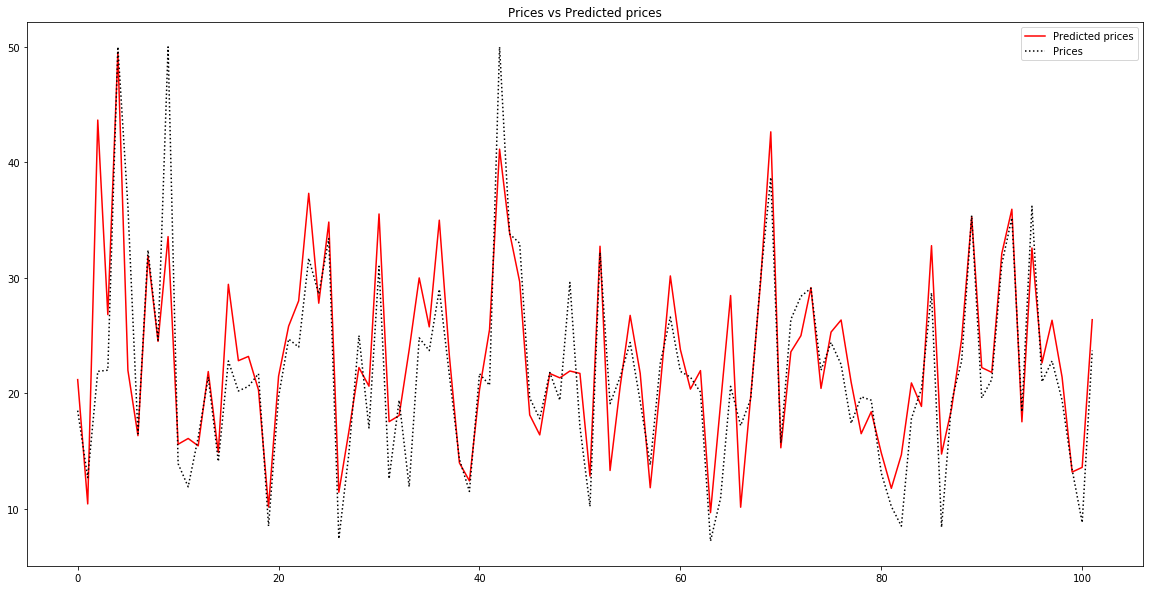

In [38]:
# plotting house prices comparisson with prediction
plt.plot(norm_predict, 'r-', label='Predicted prices')
plt.plot(Y_test.values, 'k:', label='Prices')
plt.rcParams['figure.figsize'] = (20, 10)
plt.title("Prices vs Predicted prices")
plt.legend()
plt.show()

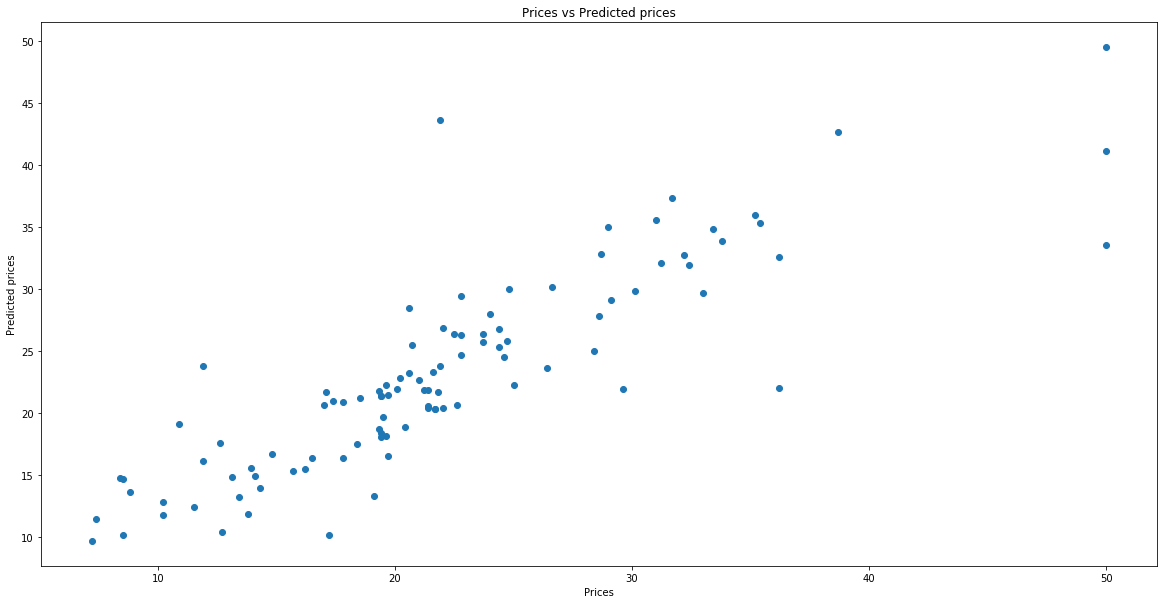

In [39]:
# scatter plot showing house price predictions
plt.scatter(Y_test, norm_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

As we can see, after normalizing the data, we obtained slightly more accurate approximation, althought still not quite as accurate as one would like.

******

### Conclusion

Over the first sections, I was able to successfully describe the dataset, along illustrating the correlation between the variables, by plotting graphs and also correlation heatmaps.

On the next section, I was able to separate the dataset into two categories, those with houses along the Charles river, and those that aren't along the river, once this was done, I dived into more statistical analysis in order to determine if this difference would affect the price of the houses.

In order determine if this variable would affect the price, I first analyzed the raw data, such as min, max, median, mean, where we could alredy see there was a slight difference in price, and I alos plotted a few graphs to be able to easily determine this difference, but in order to be 100% confident, I ran a T-test, which gave me a p-value below 1%, which implies that we can safely reject the null hypothesis, and therefore conclude that there is indeed a difference in the mean price between houses along the river and those not along river

The final section was the most challenging, as I had to build a model and train it so it could predict house prices, which I was able to successfully do it, althought despite various pre-processing methods applied, such as whitening (which I later removed, as it worsened the accuracy of the model) and normalization, the model was still unable to accurately predict the house prices on the test set.

### References

[1] https://www.kaggle.com/c/boston-housing/overview

[2] https://scikit-learn.org/stable/index.html

[3] https://keras.io/

[4] https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression

[5] https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

[6] http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf (page 86)

[7] https://www.investopedia.com/terms/t/t-test.asp